<a href="https://colab.research.google.com/github/rloaizam/MachineLearning_DengAI/blob/main/ActividadGuiada3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad guiada 3**

https://colab.research.google.com/drive/1bIgF0M361maUOgiGWGC6KaMDIOw22ihn?usp=sharing

## 1.Google Colab

In [2]:
# Importamos módulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

## 2.Python: Seaborn

### Adquirir datos

In [3]:
# Cargamos el dataset de los pasajeros del Titanic
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s = requests.get(url).content
titanic = pd.read_csv(io.StringIO(s.decode('utf-8')))

### Explorar datos

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
# Renombramos las columnas
titanic.rename(columns={'class': 'clase', 'fare': 'tarifa'}, inplace=True)

# Muestra los valores distintos para la columna "clase"
titanic.clase.unique()

# Muestra las primeras 5 filas del DataFrame
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Definiendo nuevas columnas en el dataset

In [6]:
# Añadimos nuevas columnas: is_old, is_baby
def is_old_func(row):
    return row['age'] > 60

titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

# Otra forma de definir una nueva columna
titanic.eval('is_baby = age < 15', inplace=True)

In [7]:
def class_num_func(row):
    Clase = {'Third': 3, 'First': 1, 'Second': 2}
    return Clase[row.clase]

titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

In [8]:
#Primeras 5 filas
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


### Consulta de datos con condiciones

In [9]:
# Consulta con condiciones
titanic[
    (titanic.sex == 'female') &
    (titanic['clase'].isin(['First', 'Third'])) &
    (titanic.age > 45) &
    (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


### Distribución de las clases

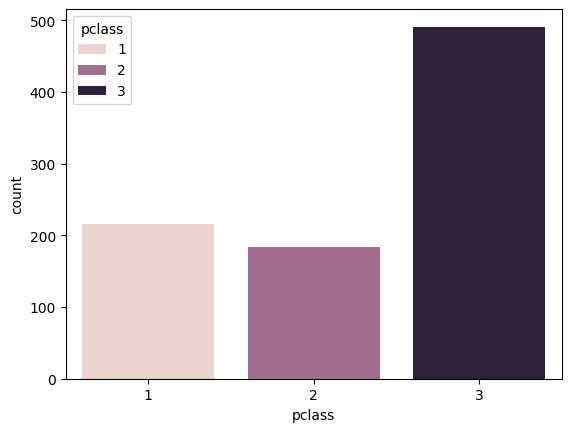

In [10]:
# Distribución de las clases
sns.countplot(x="pclass", hue ="pclass", data=titanic)
plt.show()  # Mostrar el gráfico

### Distribución de la edad

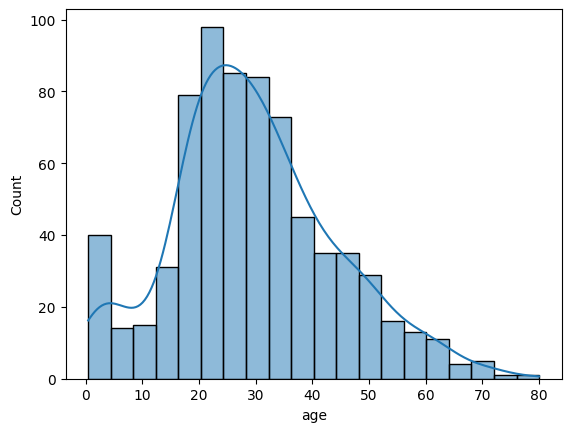

In [11]:
# Histograma de la distribución de edades con KDE
sns.histplot(titanic.age.dropna(), kde=True)
plt.show()

### BoxPlot de la edad por sexo y clase

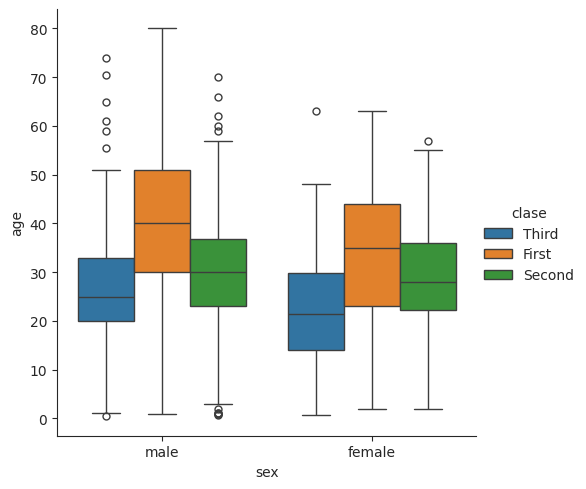

In [12]:
with sns.axes_style(style='ticks'):
    ax = sns.catplot(data=titanic, x="sex", y="age", hue="clase", kind="box")

### Distribución cruzada de edad  y tarifa

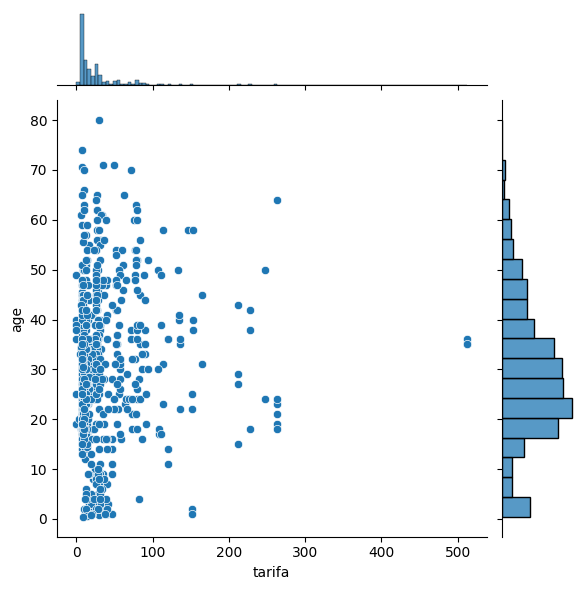

In [13]:
#Distribución cruzada de Edad y Tarifa
sns.jointplot(x='tarifa',y='age',data=titanic)

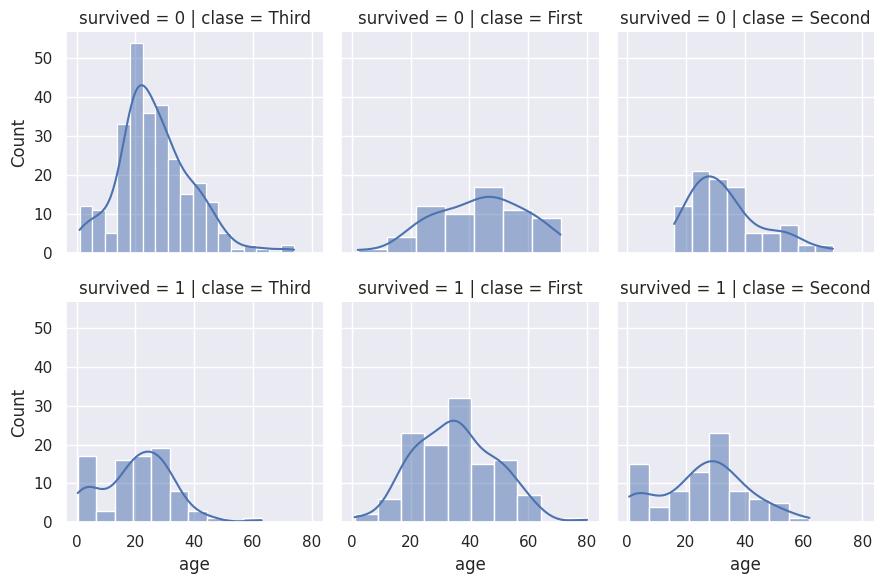

In [14]:
import seaborn as sns

# Cambiamos el tamaño de la fuente
sns.set(font_scale=1)

# FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='survived', col='clase')
g.map(sns.histplot, "age", kde=True)
plt.show()

### Distribución de la edad según la categorías: survived, clase

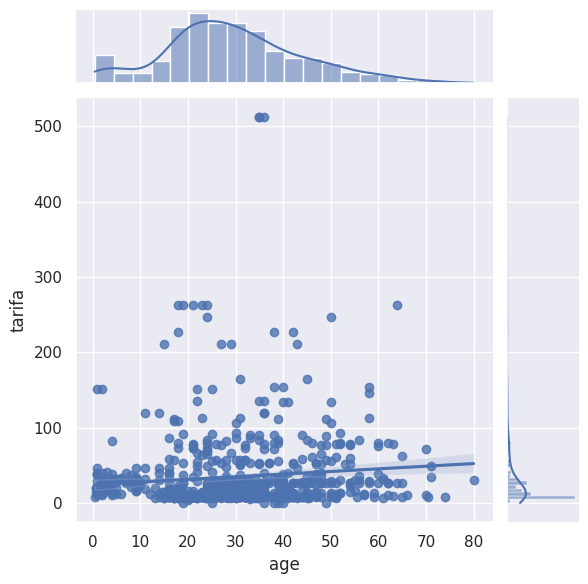

In [15]:
# Diagrama de dispersión con distribución de cada variable
sns.jointplot(data=titanic, x='age', y='tarifa', kind='reg', color='b')
plt.show()

### Mapa de calor de correlaciones

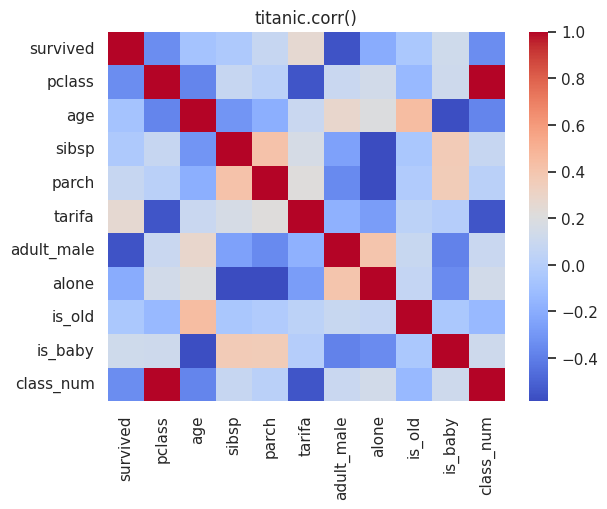

In [17]:
# Calculamos la matriz de correlación entre columnas numéricas
tc = titanic.corr(numeric_only=True)

# Creamos el mapa de calor de correlaciones
sns.heatmap(tc, cmap='coolwarm')
plt.title('titanic.corr()')
plt.show()

### Diagramas de dispersión de parejas de variables cuantitativas

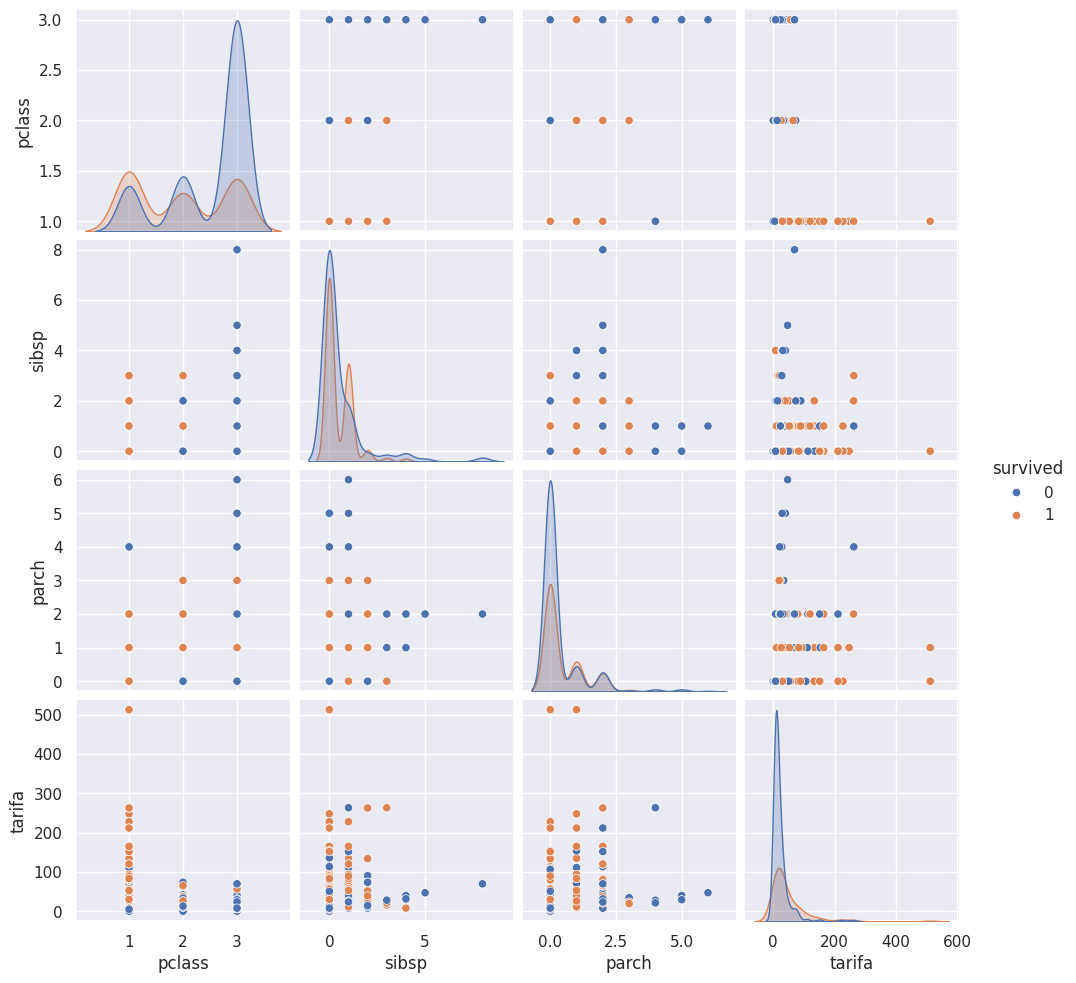

In [18]:
# Define un subconjunto de datos con las variables numéricas
titanic_num = titanic[['survived', 'pclass', 'sibsp', 'parch', 'tarifa']]

# Crea una matriz de diagramas de dispersión de parejas de variables
sns.pairplot(titanic_num, hue="survived")
plt.show()

### Diagramas de dispersión de parejas de variables cuantitativas. Dataset: iris

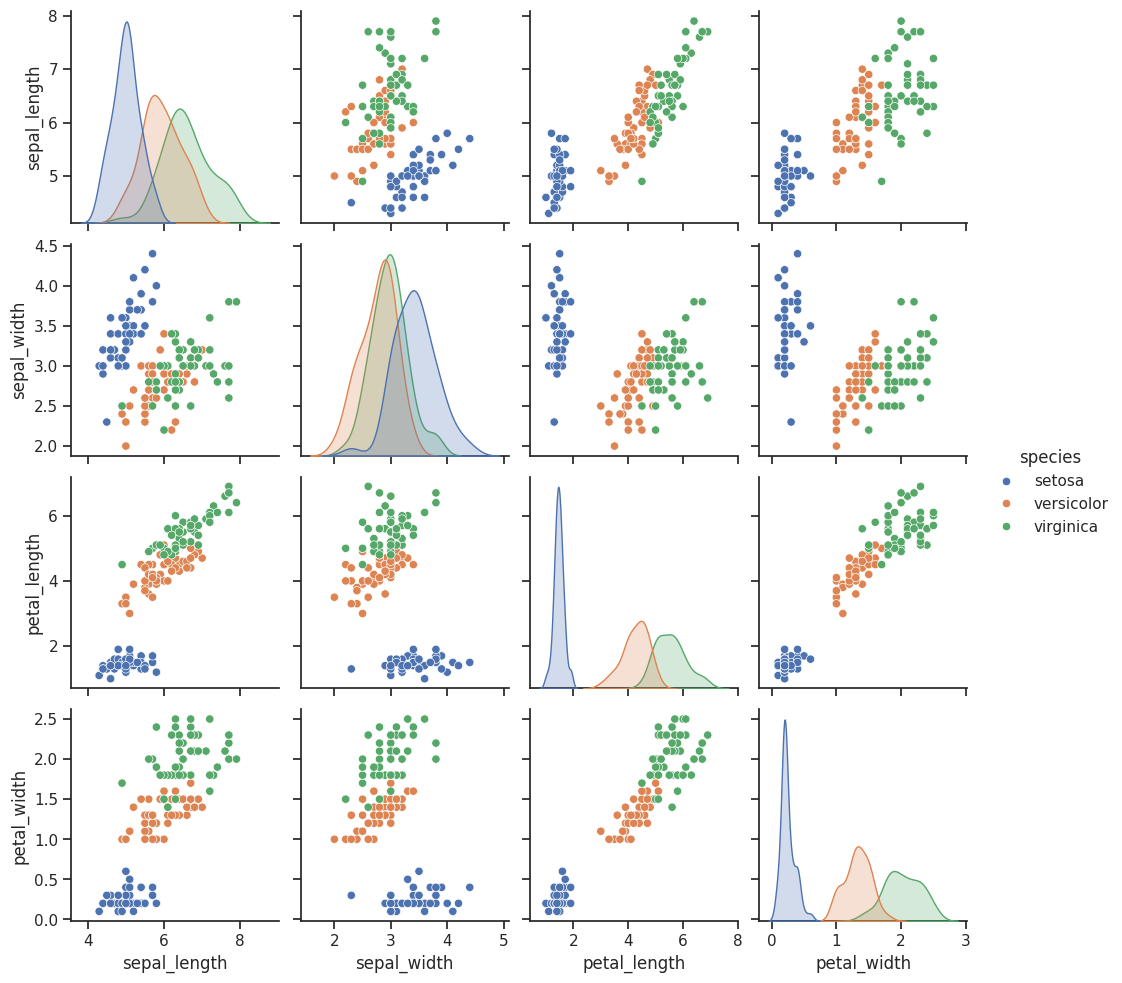

In [19]:
# Establece el estilo estético de las tramas
sns.set(style="ticks")

# Carga el conjunto de datos "iris"
df = sns.load_dataset("iris")

# Crea una matriz de diagramas de dispersión
sns.pairplot(df, hue="species")

### Diagramas de distribución de clase/edad y supervivientes

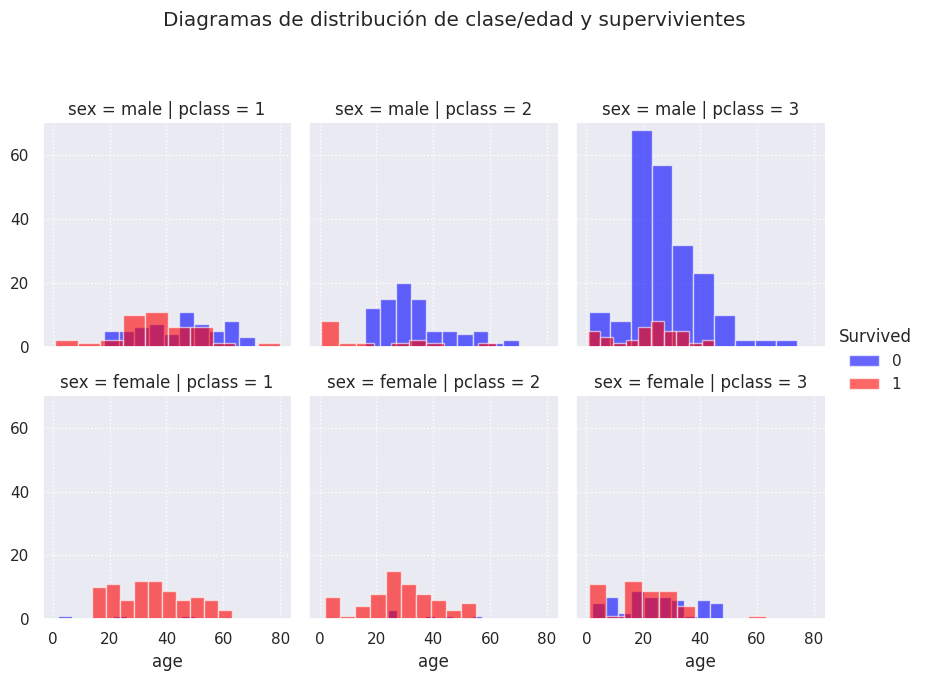

In [63]:
import numpy as np

# Establecer el estilo de Seaborn para todos los gráficos
sns.set_style('darkgrid', {'grid.color': 'white', 'grid.linestyle': ':'}) # Cuadrícula blanca sobre fondo gris

# Definir la paleta de colores para los valores de 'survived'
palette = {0: "blue", 1: "red"}

# Crear el FacetGrid
g = sns.FacetGrid(titanic, row='sex', col='pclass', hue='survived',
                  height=3.5, aspect=0.8, hue_order=[0, 1], palette=palette)

# traza la distribución de la variable 'age' en cada subgráfico
#con transparencia en las barras del histograma de 60% y dividiendo los datos en 10 contenedores
g.map(plt.hist, 'age', alpha=0.6, bins=10)

for ax in g.axes.flat:  # Iterar sobre todos los ejes del FacetGrid
    ax.set_ylim(0, 80)  # Establece el límite superior del eje 'y' como 80
    ax.set_yticks(np.arange(0, 81, 20))  # Establece las marcas del eje y de 0 a 80 de 20 en 20

for i, ax in enumerate(g.axes.flat):
    row_name = g.row_names[i // len(g.col_names)]
    col_name = g.col_names[i % len(g.col_names)]
    ax.set_title(f'sex = {row_name} | pclass = {col_name}')
    ax.set_ylabel('')
    ax.set_ylim(0,70)  # Aquí se establece el límite del eje 'y'

# Ajuste de la leyenda para que quede separada del gráfico
g.add_legend(title='Survived', bbox_to_anchor=(0.9, 0.5), loc='center left')

g.fig.suptitle('Diagramas de distribución de clase/edad y supervivientes', y=1)
# Ajuste adicional para asegurar que todo se ajusta correctamente
g.fig.tight_layout(rect=[0, 0.03, 0.92, 0.95])
plt.show()